# Pymanopt and a Look at the simple 2 Grant Graph
___

A summary of things i've learned and seen so far.

- Pymanopt for optimising on manifolds
- 2 contributor, 2 grant graph with different constraints

### Pymanopt

For optimisation on manifolds

1. Choose manifold
2. Make cost function
3. Choose solver (differentiation tool, autograd in my case)

In [2]:
from pymanopt.manifolds import Sphere, Euclidean
from pymanopt.solvers import SteepestDescent
from pymanopt import Problem
import autograd.numpy as np
import matplotlib.pyplot as plt

1. On the unit circle find the point that is closest to point $(2, 3)$

The cost function is the distance from the circle to the point.

<img width=400, src="pymanopt_img/point_to_circle.jpeg">

Easy to solve manually ✍️:

$$
\begin{align}
s &= \sqrt{(2-\cos t)^2 + (3-\sin t)^2}\\
\frac{ds}{dt} &= \frac{2 \sin t - 3 \cos t}{(...)^{\frac{1}{2}}}\\
\vdots\\
\implies & t = \tan^{-1}{\frac{3}{2}}
\end{align}
$$

Using pymanopt:

In [2]:
# Make a manifold - circle
circle = Sphere(2)

# Make a cost function - objective 
def distance(X):
    return np.sqrt((2 - X[0])**2 + (3 - X[1])**2)

problem = Problem(manifold=circle, cost=distance)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
Xopt # Coordinate that minimises the cost function

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+4.0814651080491302e+00	8.21177952e-01
    2	+3.3376415981536756e+00	9.91663349e-01
    3	+2.6106751420713996e+00	1.18797510e-01
    4	+2.6056098515589978e+00	1.27320787e-02
    5	+2.6055584965878036e+00	4.47045729e-03
    6	+2.6055556454777231e+00	3.47769536e-03
    7	+2.6055516815822641e+00	1.06017414e-03
    8	+2.6055512951300419e+00	2.33297249e-04
    9	+2.6055512764878381e+00	5.32315269e-05
   10	+2.6055512754834873e+00	7.34583990e-06
   11	+2.6055512754712380e+00	4.47902127e-06
   12	+2.6055512754674384e+00	3.08984170e-06
   13	+2.6055512754640247e+00	3.13509872e-07
Terminated - min grad norm reached after 13 iterations, 0.11 seconds.



array([0.55470029, 0.83205023])

In [3]:
# Compare with derived value of t = arctan(3/2)

x, y = np.cos(np.arctan(3/2)), np.sin(np.arctan(3/2))
x, y

(0.5547001962252291, 0.8320502943378436)

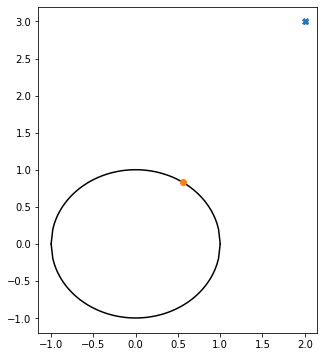

In [4]:
_, ax = plt.subplots(1, figsize=(5, 6))

lin_x = np.linspace(-1, 1, 100)
lin_y_p = np.sqrt(1 - lin_x ** 2 )
lin_y_n = - lin_y_p
ax.plot(lin_x, lin_y_p, c="black")
ax.plot(lin_x, lin_y_n, c="black")
ax.plot(2, 3, 'X')
ax.plot(*Xopt, 'o')

### Line to Circle:

On the unit circle find the point that is closest to line $y = -x + 3$

<img width=400px, src="pymanopt_img/line_to_circle_.jpeg">

Also quite simple to check:

$$
\begin{align}
s &= \sqrt{(\cos t - x)^2 + (\sin t -(-x+3)^2} \>\>\>\>\>\> \text{smells circular}\\
\vdots\\
&= \sqrt{2x^2 - (6 + 2(\cos t + \sin t))x - (6 \sin t - 10)}\>\>\>\>\>\> \text{This form smells parabolic}\\
x' &= \frac{\partial s}{\partial x} = \cdots = \frac{3+ \cos t + \sin t}{2}\\
\vdots\\
\frac{\partial x'}{\partial t} &= \frac{-\sin t + \cos t}{2}\\
\implies & t = \frac{\pi}{4}
\end{align}
$$

Intuitively, we can see the parabola-ness of it (fix a point on the circle and move along the line) and the sinusoidal waviness of it (fix a point on the line and go around the circle)

In [5]:
## Make a manifold - Euclidean for 2d and cost function problem

manifold = Euclidean(2) # Think R^2

# Make a cost function - objective 
def distance(X):
    return np.sqrt((np.cos(X[0]) - X[1]) ** 2 + (np.sin(X[0]) + X[1] - 3) ** 2 )

problem = Problem(manifold=manifold, cost=distance)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
Xopt

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+1.8714942979147919e+00	1.43946659e+00
    2	+1.2254145699077761e+00	6.26547550e-01
    3	+1.1454709410019792e+00	1.84419069e-01
    4	+1.1324853118706117e+00	2.36409837e-01
    5	+1.1242146716519790e+00	1.05894484e-01
    6	+1.1221749803610719e+00	3.37484720e-02
    7	+1.1219595452146172e+00	6.28941736e-02
    8	+1.1213884039787931e+00	2.04701384e-02
    9	+1.1213209307004097e+00	1.32495206e-03
   10	+1.1213206622679863e+00	1.08105612e-03
   11	+1.1213204586657490e+00	5.26013100e-04
   12	+1.1213204192229906e+00	5.69055557e-04
   13	+1.1213203706780435e+00	3.04763313e-04
   14	+1.1213203555472915e+00	1.93710556e-04
   15	+1.1213203481522471e+00	8.22697397e-05
   16	+1.1213203458268617e+00	1.05182111e-04
   17	+1.1213203440543500e+00	3.66946919e-05
   18	+1.1213203438578228e+00	3.44165347e-05
   19	+1.1213203437962211e+00	3.48280040e-05
   20	+1.1213203436243886e+00	1.42642318e-05


array([0.78539771, 1.50000031])

In [6]:
# Analytical solution for comparison

t = (np.pi) / 4
x = (3 + np.cos(t) - np.sin(t))/2
y = -x + 3
t, x, y

(0.7853981633974483, 1.5, 1.5)

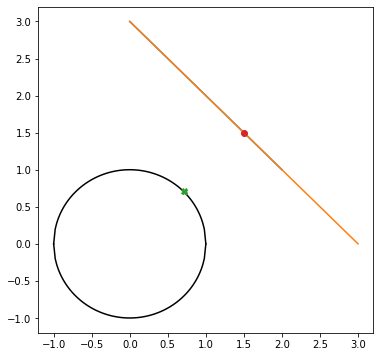

In [7]:
_, ax = plt.subplots(1, figsize=(6, 6))

lin_x = np.linspace(-1, 1, 100)
lin_y_p = np.sqrt(1 - lin_x ** 2 )
lin_y_n = - lin_y_p
ax.plot(lin_x, lin_y_p, c='black')
ax.plot(lin_x, lin_y_n, c='black')
lin_x_l = np.linspace(0, 3, 100)
lin_y_l = -lin_x_l + 3
ax.plot((lin_x + 1), -lin_x + 2)
ax.plot(lin_x_l, lin_y_l)
ax.plot(np.cos(t), np.sin(t), 'X')
ax.plot(x, y, 'o')

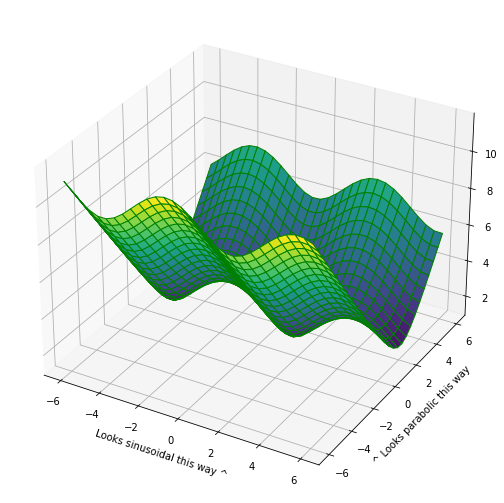

In [3]:
# Space of parameters t, x

def line_circle_solutions(a, b):
    return np.sqrt((np.cos(a) - b) ** 2 + (np.sin(a) + b - 3) ** 2 )

t = np.linspace(-6, 6, 30)
x = t.copy()
T, X = np.meshgrid(t, x)
solns = line_circle_solutions(T, X)

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection="3d", )
ax.plot_surface(T, X, solns, cmap ='viridis', edgecolor='green')
ax.set(xlabel="Looks sinusoidal this way ^", ylabel="^ Looks parabolic this way");

### Relevance to n.grants = n.contributors = 2 Graph

As Octopus has said already, if we can visualise the space of graph outcomes, maybe it can yield some intuition or hints about what characteristics optimal outcomes have.

In the simple cases which I want to look at, we can easily visualise the space of outcomes. For variables $a_1, b_1, a_2, b_2$ ($a_1^2$ denotes $1$'s contribution to $a$), the subject of our optimisation is:

$$
Q = a_1 a_2 + b_1 b_2
$$

This is because we are looking to optimize the total match $Q$ from both of the colluded funds

\begin{equation}
Q = F(a) + F(b)
\end{equation}

where

\begin{equation}
F(g) = \displaystyle \left( \sum_i g_i \right)^2 - \sum_i g_i^2
\end{equation}

Using different budget constraints, this can be transformed into 3 dimensional things. Some choices of constraints we could implement are:
- Set each contributor's budget to 1
- Set the donations earned by a project to 1
- Set the total of donations earned by all projects to 1

While some versions of the problem are more relevant than others, geometric interpretation may yield useful insights

For the first version of the budget constraints, we have $a_1^2 + b_1^2 = 1$ (Contributor $1$'s total contribution is $1$) and corresponding constraint for contributor $2$

In this case we can rewrite $Q$ as a 3D problem by eliminating the $b$s
$$Q(a_1, a_2) = a_1 a_2 + \sqrt{1 - a_1^2} \sqrt{1 - a_2^2}$$

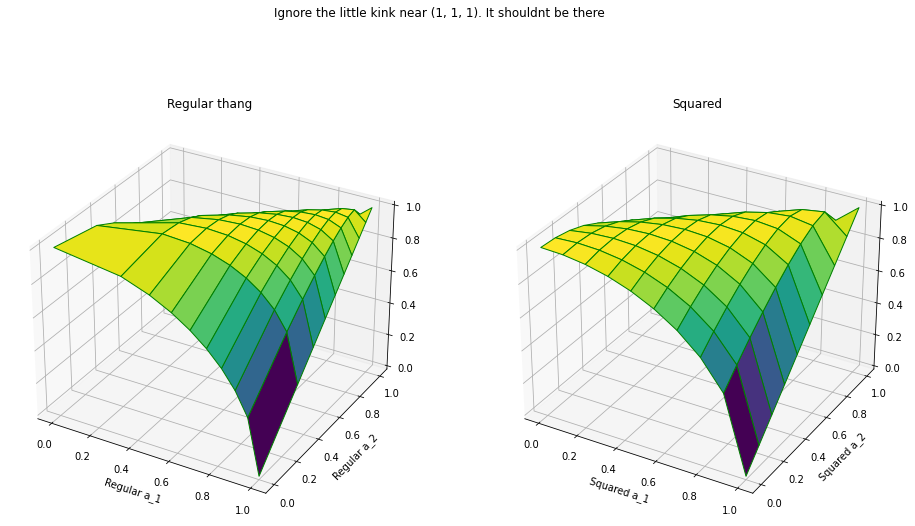

In [30]:
# Budget constraint 1

def Q(a_1, a_2):
    return a_1 * a_2 + np.sqrt(1 - a_1**2) * np.sqrt(1 - a_2**2)

a_1 = np.sqrt(np.linspace(0, 1, 10))
a_2 = a_1.copy()
X, Y = np.meshgrid(a_1, a_2)
Z = Q(X, Y)

X_sq, Y_sq = np.meshgrid(a_1**2, a_2**2)
Z_sq = Q(X_sq, Y_sq)

fig = plt.figure(figsize=(16, 9))
fig.suptitle("Ignore the little kink near (1, 1, 1). It shouldnt be there")
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor='green')
ax.set_title("Regular thang")
ax.set(xlabel="Regular a_1", ylabel="Regular a_2");

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(X_sq, Y_sq, Z_sq, cmap ='viridis', edgecolor='green')
ax2.set_title("Squared")
ax2.set(xlabel="Squared a_1", ylabel="Squared a_2");

In [18]:
# Pymanopt with first set of constraints

plane = Sphere(2)

# Make a cost function - objective
def distance(X):
    return -(abs(X[0]) * abs(X[1]) + np.sqrt(1 - abs(X[0])**2) * np.sqrt(1 - abs(X[1])**2))

problem = Problem(manifold=plane, cost=distance, verbosity=2)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
Xopt

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-9.2443769595501935e-02	1.99143581e+00
    2	-9.9571790656941273e-01	1.84887539e-01
    3	-9.9821242724794579e-01	1.19531587e-01
    4	-9.9972090297632665e-01	4.72489641e-02
    5	-9.9996558241055233e-01	1.65932510e-02
    6	-9.9997920699816123e-01	1.28973751e-02
    7	-9.9999799541062928e-01	4.00458473e-03
    8	-9.9999994098051914e-01	6.87135964e-04
    9	-9.9999999994634148e-01	2.07187898e-05
   10	-9.9999999999971290e-01	1.51564054e-06
   11	-9.9999999999994138e-01	6.85220136e-07
Terminated - min grad norm reached after 11 iterations, 0.04 seconds.



array([ 0.70710667, -0.7071069 ])

something is not working as I would have expected it to here. Why does it only yield the one point?

Text(0.5, 0.92, 'squared meshgrid - Actual contribution')

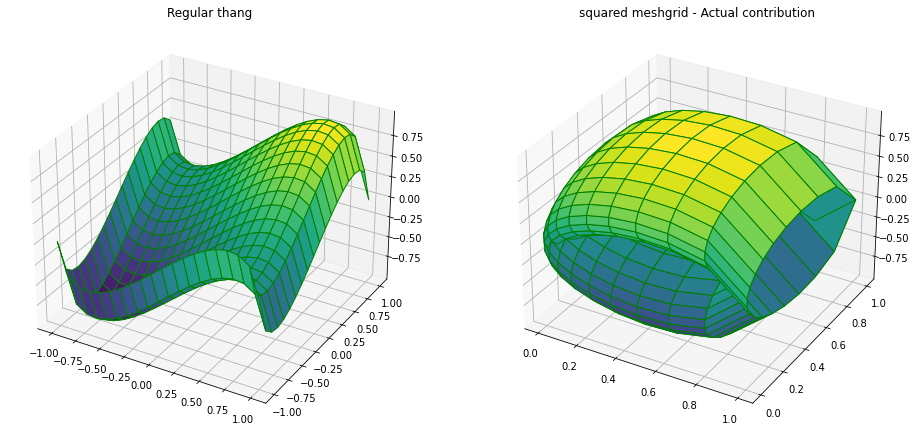

In [12]:
# Other constraint 

def Q_2(a_1, b_1):
    return a_1 * np.sqrt(1 - a_1**2) + b_1 * np.sqrt(1 - b_1**2)

a_1 = np.linspace(-1, 1, 20)
b_1 = a_1.copy()
A, B = np.meshgrid(a_1, b_1)
A_sq, B_sq = np.meshgrid(a_1**2, b_1**2)
Q_2 = Q_2(A, B)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(A, B, Q_2, cmap ='viridis', edgecolor='green')
ax.set_title("Regular thang")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(A_sq, B_sq, Q_2, cmap ='viridis', edgecolor='green')
ax2.set_title("squared meshgrid - Actual contribution")

In [13]:
## Make a manifold - Sphere for some reason

plane = Sphere(2)

# Make a cost function - objective 
def distance(X):
    return -(abs(X[0]) * np.sqrt(1 - abs(X[0])**2) + np.sqrt(1 - abs(X[1])**2) * abs(X[1]))

problem = Problem(manifold=plane, cost=distance, verbosity=2)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
Xopt
# :(

# Using abs() on X and turning the function negative made it work.

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-6.9134142562503692e-02	1.99521475e+00
    2	-9.9760737283369527e-01	1.38268285e-01
    3	-9.9936508220173248e-01	7.12581918e-02
    4	-9.9990633587450761e-01	2.73729412e-02
    5	-9.9998148176760715e-01	1.21714620e-02
    6	-9.9999999611450585e-01	1.76306420e-04
    7	-9.9999999989635047e-01	2.87957747e-05
    8	-9.9999999999796230e-01	4.03755453e-06
    9	-9.9999999999936484e-01	2.25411467e-06
   10	-9.9999999999999312e-01	2.34746727e-07
Terminated - min grad norm reached after 10 iterations, 0.06 seconds.



array([0.7071068 , 0.70710676])

In [19]:
1/np.sqrt(2)

0.7071067811865475

To make it work, avoid negative square roots by taking the aboslute value, return the negavtive of the cost function and do it on Sphere(2). I don't understand why it works on Sphere(2) and not on Euclidean(2). It was Octopus' suggestion.

We can show that the sphere for the CLR algorithm has a similar shape but a lower maximum for the matching function $Q$.  The objective function in this case is
$$Q = \displaystyle \frac{a_1 a_2 + \sqrt{1 - a_1^2} \sqrt{1 - a_2^2}}{1 + a_1 a_2 + \sqrt{1 - a_1^2} \sqrt{1 - a_2^2}}$$

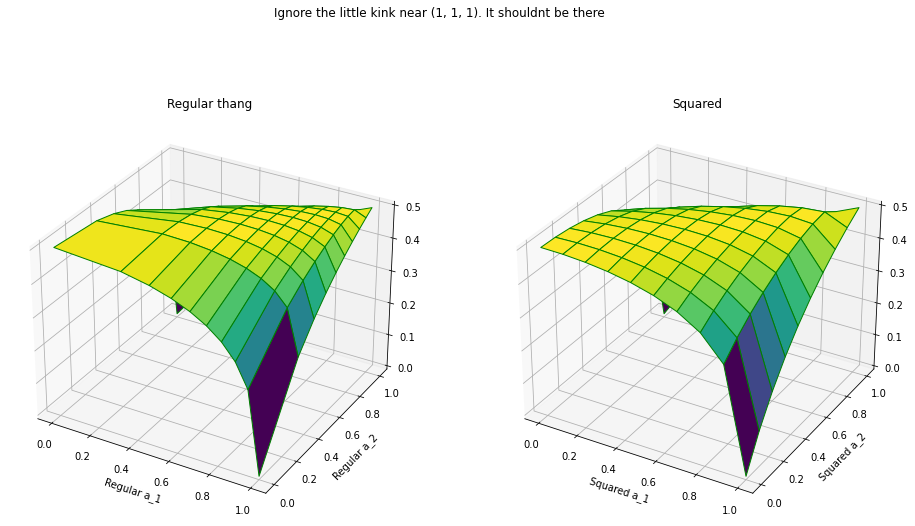

In [56]:
# CLR Budget Constraint

def Q(a_1, a_2):
    return (a_1 * a_2 + np.sqrt(1 - a_1**2) * np.sqrt(1 - a_2**2))/(1 + a_1 * a_2 + np.sqrt(1 - a_1**2) * np.sqrt(1 - a_2**2))

a_1 = np.sqrt(np.linspace(0, 1, 10))
a_2 = a_1.copy()
X, Y = np.meshgrid(a_1, a_2)
Z = Q(X, Y)

X_sq, Y_sq = np.meshgrid(a_1**2, a_2**2)
Z_sq = Q(X_sq, Y_sq)

fig = plt.figure(figsize=(16, 9))
fig.suptitle("Ignore the little kink near (1, 1, 1). It shouldnt be there")
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor='green')
ax.set_title("Regular thang")
ax.set(xlabel="Regular a_1", ylabel="Regular a_2");

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(X_sq, Y_sq, Z_sq, cmap ='viridis', edgecolor='green')
ax2.set_title("Squared")
ax2.set(xlabel="Squared a_1", ylabel="Squared a_2");

In [76]:
# Pymanopt with first set of constraints
# Degenerative case where 

plane = Sphere(2)

# Make a cost function - objective
def distance(X):
    return -((abs(X[0]) * abs(X[1]) + np.sqrt(1 - abs(X[0])**2) * np.sqrt(1 - abs(X[1])**2))/(1 + abs(X[0]) * abs(X[1]) + np.sqrt(1 - abs(X[0])**2) * np.sqrt(1 - abs(X[1])**2)))

problem = Problem(manifold=plane, cost=distance, verbosity=2)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
Xopt

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-4.8435502713944317e-01	1.82424510e-01
    2	-4.9754900854640804e-01	7.03573704e-02
    3	-4.9972163862693175e-01	2.36081088e-02
    4	-4.9974922749669903e-01	2.24064327e-02
    5	-4.9984743266623133e-01	1.74734344e-02
    6	-4.9998744518633886e-01	5.01107656e-03
    7	-4.9999805140167852e-01	1.97413956e-03
    8	-4.9999974641942385e-01	7.12152839e-04
    9	-4.9999988579953203e-01	4.77913214e-04
   10	-4.9999999444825111e-01	1.05373137e-04
   11	-4.9999999972357984e-01	2.35125572e-05
   12	-4.9999999998972727e-01	4.53271598e-06
   13	-4.9999999999606065e-01	2.80690774e-06
   14	-4.9999999999854511e-01	1.70580081e-06
   15	-4.9999999999927142e-01	1.20715019e-06
   16	-4.9999999999928058e-01	1.19953594e-06
   17	-4.9999999999931671e-01	1.16899299e-06
   18	-4.9999999999945366e-01	1.04533867e-06
   19	-4.9999999999986411e-01	5.21313247e-07
Terminated - min grad norm reached after 19 i

array([-0.70710659, -0.70710697])

In [81]:
# CLR Budget Constraint

def Q(a1, a2, b1, b2):
    return (a1 * a2 + b1 * b2)/(1 + a1 * a2 + b1 * b2)

# Not as easy to plot in 4D so we'll skip it

# Pymanopt with first set of constraints

plane = Sphere(4)

# Make a cost function - objective
def distance(X):
    return -(abs(X[0]) * abs(X[1]) + abs(X[2]) * abs(X[3]))/(1 + abs(X[0]) * abs(X[1]) + abs(X[2]) * abs(X[3]))

problem = Problem(manifold=plane, cost=distance, verbosity=2)
solver = SteepestDescent()
Xopt = solver.solve(problem=problem)
print('Optimal collusion strategy is ', abs(Xopt))
print('Match Q of optimal strategy = ', Q(abs(Xopt[0]), abs(Xopt[1]), abs(Xopt[2]), abs(Xopt[3])))


print('Match Q of solution to 2D sphere = ', Q(1./np.sqrt(2), 1./np.sqrt(2), 1 - 1./np.sqrt(2), 1 - 1./np.sqrt(2)))



Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	-2.5663493303795654e-01	3.99724247e-01
    2	-2.6561383267037580e-01	3.72385357e-01
    3	-2.9626762737700635e-01	2.67178577e-01
    4	-3.2387952299125045e-01	1.31012397e-01
    5	-3.3160141317000935e-01	5.55964688e-02
    6	-3.3331186208405050e-01	6.17842649e-03
    7	-3.3333204798744648e-01	1.51164346e-03
    8	-3.3333214116601362e-01	1.45582082e-03
    9	-3.3333248474925037e-01	1.22824949e-03
   10	-3.3333330262822947e-01	2.33638300e-04
   11	-3.3333331976350067e-01	1.55319502e-04
   12	-3.3333333239652380e-01	4.08097922e-05
   13	-3.3333333289293127e-01	2.79810131e-05
   14	-3.3333333332621123e-01	3.55830843e-06
   15	-3.3333333332755005e-01	3.20645347e-06
   16	-3.3333333333166559e-01	1.72187194e-06
   17	-3.3333333333324211e-01	4.02710497e-07
Terminated - min grad norm reached after 17 iterations, 0.05 seconds.

Optimal collusion strategy is  [0.64328742 0.64328747 0.29356646

In [ ]:
# Show that the optimal strategy is a continuous line segment


In [ ]:
# Show how much the colluded match varies when we add an error term epsilon
# to the optimal strategy 

epsilon = np.arange(0,.3,.01)
q = Q(.5, .5 - epsilon)
q